In [1]:
import sys
sys.path.append('../') # go to parent dir
from collections import OrderedDict
%matplotlib inline
from matplotlib import pyplot as plt
import torchvision
import torch
import torch.nn as nn
from networks.style_gan_net import MappingNet, SynthesisNet

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
g_all = nn.Sequential(OrderedDict([
    ('g_mapping', MappingNet()),
    ('g_synthesis', SynthesisNet())
]))
g_all.load_state_dict(torch.load('../pretrained/karras2019stylegan-ffhq-1024x1024.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

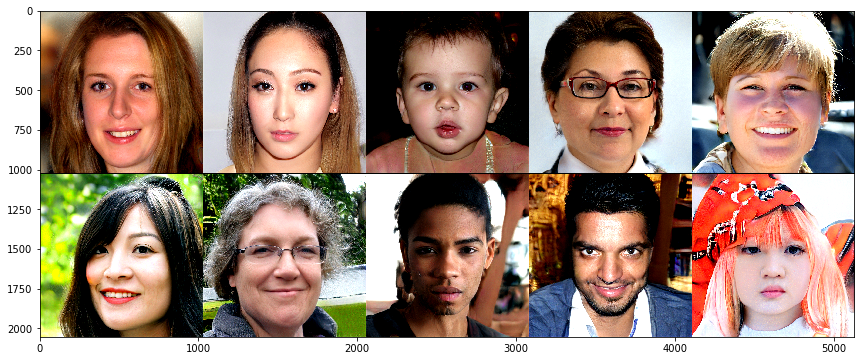

In [3]:
%matplotlib inline
from matplotlib import pyplot
import torchvision
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
g_all.eval()
g_all.to(device)

torch.manual_seed(77)
nb_rows = 2
nb_cols = 5
nb_samples = nb_rows * nb_cols
latents = torch.randn(nb_samples, 512, device=device)
with torch.no_grad():
    imgs = g_all(latents)
    imgs = (imgs.clamp(-1, 1) + 1) / 2.0 # normalization to 0..1 range
imgs = imgs.cpu()

imgs = torchvision.utils.make_grid(imgs, nrow=nb_cols)

pyplot.figure(figsize=(15, 6))
pyplot.imshow(imgs.permute(1, 2, 0).detach().numpy())